In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.transforms import offset_copy
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd

import gdal

%matplotlib inline

def make_map(projection=ccrs.LambertConformal()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.xlocator = mticker.FixedLocator([-74, -73, -72, -71, -70])
    gl.ylocator = mticker.FixedLocator([40, 41, 42])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [7]:
buoys = pd.read_excel('buoys.xlsx', header=0, index_col=None, usecols="C:E")
buoys.head()

,Buoys,Longitude,Latitude
0,44097,-71.127,40.969
1,44020,-70.279,41.493
2,44025,-73.164,40.251
3,44017,-72.049,40.693
4,44065,-73.703,40.369


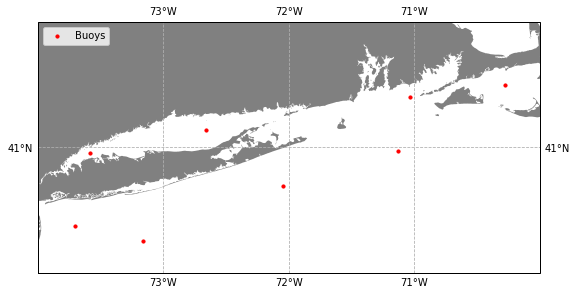

In [9]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent([-74, -70, 40, 42])

# Add markers for the position of the buoys.
plt.scatter(buoys['Longitude'], buoys['Latitude'], s=10, marker='o', color='red', label='Buoys',
            transform=ccrs.Geodetic())

shp = shapereader.Reader('C:/Users/panmits86/Desktop/Python/SNE_shapefile/GSHHS_f_L1_SNE.shp')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='gray')
    
ax.legend(loc='upper left')

plt.savefig('SNE_buoys.png', dpi=300, bbox_inches='tight')

In [ ]:
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=10)

# Add text 15 pixels to the right of the buoys.
plt.text(buoys['Longitude'], buoys['Longitude'], buoys['Buoys'],
             verticalalignment='center', horizontalalignment='left',
             transform=text_transform,
             bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

In [ ]:
plt.savefig('SNE.png', dpi=300, bbox_inches='tight')
edgecolor='black'